# COMP7043 Deep Learning and its Applications - PyTorch Tutorial
`VERSION 1.0` by Zhenghao WU ([ECWU](https://ecwuuuuu.com))

## Introduction to PyTorch

In [1]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [2]:
import torch
print(f"Installed PyTorch Version: {torch.__version__}")

d:\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Installed PyTorch Version: 1.13.1+cu117


## Tensors and Operations

Tensors are a specialized data structure that are very similar to arrays and matrices (multi-dimensional array). In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensor can have different data types such as float, integer, or boolean, which is similar to NumPy’s ndarray and, except that **tensors can run on GPUs or other hardware accelerators**. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also **optimized for automatic differentiation**.

### Creating / Initializing tensors

In [3]:
# Direct create
tensor_a = torch.zeros(2, 3)
print(tensor_a)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [4]:
# From Numpy Array
import numpy as np

numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor_b = torch.from_numpy(numpy_array)
print(tensor_b)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [6]:
# From another tensor
tensor_c = torch.tensor([[1, 2, 3], [4, 5, 6]])

# When you use torch.tensor(), you create a new tensor
# without any connection to the original tensor's computational
# graph or gradient history. This means that the new tensor will
# not have any gradients associated with it, and it will not
# participate in any future gradient calculations or
# backpropagation.

# tensor_d = torch.tensor(tensor_c)
# print(tensor_d)

tensor_e = tensor_c.clone().detach()

print(tensor_e)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [7]:
# Fill in random or constant values
tensor_f = torch.rand(3, 2)  # Uniform Distribution
print(tensor_f)

tensor_g = torch.randn(2, 2)  # Normal Distribution
print(tensor_g)

tensor_h = torch.full((3, 3), 7)  # Filled with constant value
print(tensor_h)

tensor([[0.1831, 0.9155],
        [0.2909, 0.0370],
        [0.1526, 0.6224]])
tensor([[-1.1225,  0.4461],
        [ 0.1892,  0.5554]])
tensor([[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]])


### Attributes of a Tensor

Tensors in PyTorch have several attributes that provide information about their shape, data type, and other properties. Here are some of the commonly used attributes of a PyTorch tensor.

- Shape: It represents the size of each dimension of the tensor. You can access it using the shape attribute or the size() method. For example, tensor.shape or tensor.size() will return the shape of the tensor.
- Datatype: It indicates the data type of the elements stored in the tensor. PyTorch supports various data types such as torch.float32, torch.int64, torch.bool, etc. You can access the data type of a tensor using the dtype attribute.
- Device: It specifies the device (CPU or GPU) on which the tensor is stored. You can use the device attribute to check if the tensor is on the CPU or GPU.
- `requires_grad`: This attribute indicates whether the tensor requires gradient computation for automatic differentiation. By default, tensors created directly from data do not require gradients. You can enable gradient tracking by setting `requires_grad=True` on a tensor.

In [9]:
tensor = torch.zeros(2, 3, 4)
print(f"tensor shape: {tensor.shape}")  # This is a attribute, not function
print(f"tensor size: {tensor.size()}")

print(f"tensor dtype: {tensor.dtype}")
tensor = torch.zeros(2, 3, dtype=torch.float64)  # explicite define the dtype for tensor
print(f"tensor dtype: {tensor.dtype}")

tensor = torch.zeros(2, 3).to('cuda')
print(f"tensor device: {tensor.device}")

tensor shape: torch.Size([2, 3, 4])
tensor size: torch.Size([2, 3, 4])
tensor dtype: torch.float32
tensor dtype: torch.float64
tensor device: cuda:0


### Operations

In PyTorch, tensors support a wide range of operations (100+) for manipulating and performing computations on the data they contain. Including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described [here](https://pytorch.org/docs/stable/torch.html). Here are some example.


In [10]:
# Standard numpy-like indexing and slicing: Tensors can be indexed and sliced using similar syntax as NumPy arrays.

tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Indexing
print(tensor[0, 1])

# Slicing
print(tensor[:, 1:])

tensor(2)
tensor([[2, 3],
        [5, 6]])


In [11]:
# Joining Tensors

tensor1 = torch.tensor([[1, 2], [3, 4]])
tensor2 = torch.tensor([[5, 6], [7, 8]])

concatenated = torch.cat((tensor1, tensor2), dim=0)
print(concatenated)

stacked = torch.stack((tensor1, tensor2), dim=0)
print(stacked)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [12]:
# Reshape

tensor = torch.tensor([[1, 2], [3, 4]])

reshaped = torch.reshape(tensor, (4,))
print(reshaped)

tensor([1, 2, 3, 4])


In [13]:
# Arithmetic Operations

tensor1 = torch.tensor([[1, 2], [3, 4]])
tensor2 = torch.tensor([[5, 6], [7, 8]])

result = tensor1 + tensor2
print(result)

result = tensor1 * tensor2  # Element-wise
print(result)

result = torch.matmul(tensor1, tensor2)
print(result)

tensor([[ 6,  8],
        [10, 12]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[19, 22],
        [43, 50]])


## Building Neural Networks

### `nn.Module` Class

It serves as a base class for all neural network modules in PyTorch and is used to define the architecture and behavior of the network. It provides a convenient way to organize the parameters of a model and define the forward pass computation. To create your own neural network using nn.Module, you need to define a subclass of nn.Module and override two key methods: `__init__` and `forward`. The `__init__` method is used to define the layers and modules of your network, while the `forward` method specifies the forward pass computation.

In [3]:
import torch
import torch.nn as nn

class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        # Define the layers and modules of your network
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)
 
    def forward(self, x):
        # Define the forward pass computation
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In the `__init__` method, you can define any layers or modules you need for your network. In this example, we define two fully connected layers (`nn.Linear`) with specified input and output sizes.
In the forward method, you specify the sequence of operations that will be applied to the input `x` during the forward pass. In this example, we apply the first linear layer (`self.fc1`), followed by a ReLU activation function (`torch.relu`), and finally the second linear layer (`self.fc2`).

In [4]:
batch_size = 1
in_features = 10

model = MyNetwork()

input_data = torch.randn(batch_size, in_features)
output = model(input_data)

print(f"input: {input_data}\noutput: {output}")

input: tensor([[ 1.5166, -0.0746,  0.8971,  1.3344, -0.0321,  0.0018,  0.8580,  0.4342,
         -0.2803, -1.6361]])
output: tensor([[-0.3503,  0.0285]], grad_fn=<AddmmBackward0>)


### Predefined Layers
PyTorch's nn module provides a wide range of predefined layers that you can use to build your neural networks.

- `nn.Linear`: This layer implements a fully connected (linear) operation. It applies a linear transformation to the input data, where each input element is multiplied by a weight and summed with a bias term.
- `nn.Conv2d`: This layer performs 2D convolutional operations on input data, commonly used in image processing tasks. It applies a set of learnable filters (kernels) to the input tensor to extract local features.
- `nn.Dropout`: This layer implements dropout regularization, which randomly sets input elements to zero during training. Dropout helps prevent overfitting by reducing the interdependencies between neurons.
- `nn.BatchNorm2d`: This layer performs batch normalization along the channels of a 2D input tensor. It normalizes the input by subtracting the mean and dividing by the standard deviation, which helps stabilize and accelerate the training process.
- `nn.ReLU`: This activation function applies the Rectified Linear Unit (ReLU) element-wise to the input tensor. ReLU sets negative values to zero and keeps positive values unchanged.
- `nn.Softmax`: This activation function applies the softmax operation to the input tensor, which normalizes the tensor into a probability distribution over the classes. It is commonly used for multi-class classification problems.

In [5]:
class MyNetwork(nn.Module):
    def __init__(self, in_channels, out_classes):
        super(MyNetwork, self).__init__()
        self.conv = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
         
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, out_classes)
         
        self.softmax = nn.Softmax(dim=1)
 
    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        x = self.dropout(x)
        print(x.shape)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        print(x.shape)
         
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
         
        x = self.fc2(x)
        x = self.softmax(x)
         
        return x

### Model Summary and Parameters

In [6]:
model = MyNetwork(in_channels=1, out_classes=10)
 
# Print the network structure
print(model)
 
# Calculate the parameter count
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params}")

MyNetwork(
  (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
Total parameters: 6424714


In [7]:
# !pip install torchsummary
from torchsummary import summary

In [8]:
# Instantiate the network
model = MyNetwork(in_channels=1, out_classes=10)
model = model.to("cuda:0")
# Print the model summary
summary(model, (1, 28, 28))  # Provide an example input size

torch.Size([2, 64, 28, 28])
torch.Size([2, 50176])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
           Dropout-4           [-1, 64, 28, 28]               0
            Linear-5                  [-1, 128]       6,422,656
              ReLU-6                  [-1, 128]               0
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
           Softmax-9                   [-1, 10]               0
Total params: 6,424,714
Trainable params: 6,424,714
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.53
Params size (MB): 24.51
Estimated Total Siz

## Dataset and DataLoader
PyTorch Dataset represents a dataset of input samples and their corresponding labels, while PyTorch DataLoader is responsible for efficiently loading the data from the dataset during training or inference.

### Dataset Class

The PyTorch torch.utils.data.Dataset class is a base class that you can inherit from to create your custom dataset.

To create a dataset in PyTorch, you need to override the following methods of the Dataset class:

- `__len__`: Returns the total number of data samples in the dataset.
- `__getitem__`: Retrieves a specific data sample from the dataset, given its index.

In [21]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data
 
    def __len__(self):
        return len(self.data)
 
    def __getitem__(self, index):
        sample = self.data[index]
        # Implement any necessary preprocessing or data transformations here
        # Return the preprocessed sample
        return sample
 
# Create an instance of your custom dataset
data = [1, 2, 3, 4, 5]
dataset = CustomDataset(data)
 
# Access individual data samples
for i in range(len(data)):
    sample = dataset[i]
    print(sample)  # Output: 1

1
2
3
4
5


### Built-in Datasets

PyTorch provides several built-in datasets through the `torchvision.datasets` module. These datasets are commonly used for computer vision tasks. Here are some of the popular built-in datasets:

- MNIST: Handwritten digit dataset.
- CIFAR10 and CIFAR100: Small images dataset with 10 and 100 classes, respectively.
- ImageNet: Large-scale image dataset with 1000 classes.
- FashionMNIST: Fashion product images dataset.
- COCO: Common Objects in Context dataset for object detection, segmentation, and captioning.
- VOC: Visual Object Classes dataset for object detection, segmentation, and classification.
- LSUN: Large-scale Scene Understanding dataset for scene classification and generation.
- SVHN: Street View House Numbers dataset.
- STL10: Small images dataset with 10 classes.
- CelebA: Large-scale celebrity faces dataset.

To use these built-in datasets in PyTorch, you need to follow these steps:

In [27]:
from torchvision import datasets

dataset = datasets.MNIST(root="D://Desktop//data", train=True, download=True)
 
# Access the samples
sample = dataset[1]

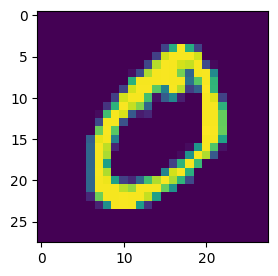

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(sample[0])
plt.show()

### Transformations

Transformations in PyTorch are operations applied to data samples in a dataset. They are commonly used to preprocess or augment the data before feeding it into a machine learning model. PyTorch provides the torchvision.transforms module, which offers a variety of predefined transformations for computer vision tasks. Here are some commonly used transformations:

- `ToTensor()`: Converts a PIL image or numpy array to a PyTorch tensor. It also scales the pixel values between 0 and 1.
- `Normalize(mean, std)`: Normalizes a tensor by subtracting the mean and dividing by the standard deviation. The mean and std arguments specify the channel-wise means and standard deviations.
- `Resize(size)`: Resizes the input PIL image to the specified size. It can take a single integer as an argument to resize the image's shorter side while maintaining its aspect ratio.
- `CenterCrop(size)`: Crops the center portion of the image to the specified size.
- `RandomCrop(size)`: Randomly crops the input image to the specified size.
- `RandomHorizontalFlip()`: Randomly flips the input image horizontally with a probability of 0.5.
- `RandomRotation(degrees)`: Rotates the input image by a random angle within the specified range.
- `RandomResizedCrop(size)`: Randomly crops and resizes the input image to the specified size.

In [29]:
import torchvision
from torchvision import transforms
 
# Define the transformations
transform = transforms.Compose([
    transforms.CenterCrop(20),  # Crops the given image at the center.
    transforms.Resize(28),  # Resize the input image to 28*28
    # transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize tensor
])
 
# Create an instance of the dataset with transformations
dataset = datasets.MNIST(root='D://Desktop//data', train=True, download=True, transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


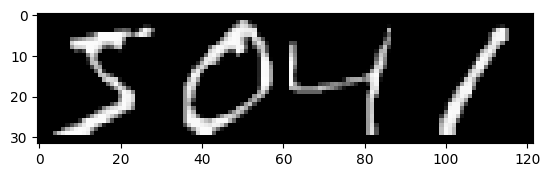

In [30]:
samples = [dataset[i] for i in range(4)]
samples = [i[0] for i in samples]

grid_img = torchvision.utils.make_grid(samples)
plt.imshow(grid_img.permute(1, 2, 0))

### What is DataLoader and how to use

In PyTorch, a DataLoader is an iterable that provides an interface to efficiently load data from a dataset during training or evaluation. It handles batch loading, shuffling, and other useful functionalities to facilitate the training process. The DataLoader takes a dataset as input and returns batches of data samples and their corresponding labels.

The relationship between a dataset and a DataLoader is that the DataLoader wraps the dataset and provides an interface to access the data in batches. It abstracts away the details of data loading and allows you to focus on training your model.

To use a DataLoader with the dataset you defined, you can follow these steps:

In [31]:
import torch
from torch.utils.data import DataLoader
 
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True, workers=16)
 
for batch_data, batch_labels in dataloader:
    # Use the batch_data and batch_labels for training or evaluation
    pass

## Training and Optimization

### Splitting data into training, validation, and test sets

The common method we use for the dataset split is from sklearn

In [32]:
from sklearn.model_selection import train_test_split
 
# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In the example above, the dataset is split into 80% training data and 20% test data. Then, the training data is further split into 80% for training and 20% for validation.

Once you have split your data into training, validation, and test sets, you can construct separate data loaders for each set.

In [33]:
# Define batch size
batch_size = 1024
 
# Create data loaders for training, validation, and test sets
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In the code above, train_data, val_data, and test_data represent the respective splits of your dataset. The `batch_size` parameter specifies the number of samples in each batch. You can adjust this value based on your computational resources and model requirements.

The DataLoader class from PyTorch is used to create the data loaders. The shuffle=True argument is passed to the training loader to randomly shuffle the samples in each epoch, which helps in improving the model's generalization.

### Defining loss functions (e.g., cross-entropy, mean squared error)

After defining the data loader and model in a deep learning task, the next steps typically involve defining the loss function and optimizer. Here's a general outline of how to do that:

The loss function measures the discrepancy between the predicted output of your model and the true labels. The choice of loss function depends on the specific task you are working on. Some common loss functions include:

- Mean Squared Error (MSE): Suitable for regression tasks where the output is continuous.
- Binary Cross-Entropy: Used for binary classification tasks where the output is a probability between 0 and 1.
- Categorical Cross-Entropy: Appropriate for multi-class classification problems where the output is a probability distribution over multiple classes.

In [34]:
# loss_fn = nn.MSELoss()
# loss_fn = nn.BCELoss()
loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.KLDivLoss()

### Choosing and configuring optimizers (e.g., SGD, Adam)

The optimizer is responsible for updating the model's parameters based on the computed gradients during the backpropagation process. It adjusts the parameters in the direction that minimizes the loss function. One commonly used optimizer is Stochastic Gradient Descent (SGD), but there are many other variants available, such as Adam, RMSprop, and Adagrad. PyTorch provides various optimizers in the torch.optim module. `To use an optimizer, you typically need to pass the model parameters and specify the learning rate`. Here's an example of defining an optimizer:

In [35]:
import torch.optim as optim
 
# optimizer = optim.SGD(model.parameters(), lr=0.001)
# Or
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Do Training

Once you have defined the model, dataloader, loss function, and optimizer, you can proceed with training your model and calculating metrics for each batch and epoch. Here's an overview of the steps involved:

Training Loop: 
- Iterate over your data for a specified number of epochs.
- In each epoch, iterate over the batches of data provided by the data loader.

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
loss_fn = loss_fn.to(device)

You'll typically follow these steps:

- Iterate over the training dataset for a specific number of epochs.
- Within each epoch, iterate over the batches of the dataset.
- Perform the forward pass through the model to obtain predictions.
- Calculate the loss using the defined loss function.
- Perform the backward pass and update the model parameters using the optimizer.
- Calculate and record the desired metrics for analysis.

In [37]:
import torch.nn.functional as F

def metric(batch_predictions, batch_labels):
    # Convert the predictions and labels to numpy arrays
    _, predicted_labels = torch.max(batch_predictions, dim=1)
    correct_predictions = (predicted_labels == batch_labels).sum().item()
    # Calculate the prediction error
    accuracy = correct_predictions / len(batch_labels)
    return accuracy

num_epochs = 10
for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_metric = 0.0
    batch_count = 0
 
    # Iterate over the batches in the dataloader
    for batch in train_loader:
        # Clear gradients from previous iteration
        batch_data, batch_labels = batch[0], batch[1]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        # print(batch_data.size())
        optimizer.zero_grad()
 
        # Forward pass
        batch_predictions = model(batch_data)
        # print(batch_predictions)
 
        # Calculate loss
        loss = loss_fn(batch_predictions, batch_labels)
        epoch_loss += loss.item()
 
        # Backward pass
        loss.backward()
        optimizer.step()
 
        # Calculate and record metrics
        batch_metric = metric(batch_predictions, batch_labels)
        epoch_metric += batch_metric
 
        batch_count += 1
     
    # Calculate average loss and metric for the epoch
    avg_epoch_loss = epoch_loss / batch_count
    avg_epoch_metric = epoch_metric / batch_count
 
    # Print or log the metrics for analysis
    print(f"Epoch {epoch+1} - Loss: {avg_epoch_loss:.4f} - Metric: {avg_epoch_metric:.4f}")

Epoch 1 - Loss: 1.8149 - Metric: 0.6442
Epoch 2 - Loss: 1.5829 - Metric: 0.8778
Epoch 3 - Loss: 1.5420 - Metric: 0.9195
Epoch 4 - Loss: 1.5226 - Metric: 0.9392
Epoch 5 - Loss: 1.5111 - Metric: 0.9505
Epoch 6 - Loss: 1.5051 - Metric: 0.9566
Epoch 7 - Loss: 1.4971 - Metric: 0.9652
Epoch 8 - Loss: 1.4931 - Metric: 0.9690
Epoch 9 - Loss: 1.4894 - Metric: 0.9725
Epoch 10 - Loss: 1.4861 - Metric: 0.9762


## Saving and Loading Models

To save a trained model in PyTorch, you can use the `torch.save()` function. This function allows you to save various components of the model, including the model's architecture, parameters, optimizer state, and any additional information you want to store.

In [38]:
torch.save(model, 'saved_model.pth')

In this example, the model object is saved in a file called "`saved_model.pth`". This file will contain the entire model, including its architecture, parameters, and other associated information.

When you load the saved model, you can use the `torch.load()` function. Here's an example of how to load the saved model:

In [39]:
loaded_model = torch.load('saved_model.pth')
loaded_model = loaded_model.to(device)
# Print the model summary
summary(loaded_model, (1, 28, 28))  # Provide an example input size

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
           Dropout-4           [-1, 64, 28, 28]               0
            Linear-5                  [-1, 128]       6,422,656
              ReLU-6                  [-1, 128]               0
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
           Softmax-9                   [-1, 10]               0
Total params: 6,424,714
Trainable params: 6,424,714
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.53
Params size (MB): 24.51
Estimated Total Size (MB): 26.05
-------------------------------------

The `torch.load()` function returns the model object, which you can assign to a variable (loaded_model in this case). After loading, you can use the loaded model for inference, evaluation, or further training.

Note that when you save the entire model using `torch.save()`, it saves the complete state of the model, including all parameters and buffers. However, it does not save the optimizer state by default. If you want to save and load the optimizer state as well, you can save it separately or include it in a dictionary along with the model.

In [40]:
# Save model and optimizer together
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}
torch.save(checkpoint, 'saved_model-w-optimizer.pth')

To load the model and optimizer together, you can use `torch.load()` and then access the saved states:

In [41]:
checkpoint = torch.load('saved_model-w-optimizer.pth')
opt_model = MyNetwork(in_channels=1, out_classes=10)
opt_optimizer = optim.Adam(opt_model.parameters(), lr=0.001)
opt_model.load_state_dict(checkpoint['model_state_dict'])
opt_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

## Transfer Learning

In PyTorch, you can use predefined models from the `torchvision.models` module, which provides a collection of popular pre-trained models for tasks such as image classification, object detection, and segmentation (There are other modules like Huggingface and FairSeq for NLP, LLM, and Multi-modal). These models are trained on large datasets like ImageNet and have learned useful features that can be leveraged for various computer vision tasks.

To use a predefined model and download its pre-trained parameters, you can follow these steps:

Import the necessary modules, and load a model:

In [42]:
import torchvision.models as models

model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\32966/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:23<00:00, 4.38MB/s]


In this example, the ResNet-50 model is loaded with pre-trained weights. You can choose different models such as ResNet-18, VGG-16, etc. Here is the full model list:

Table of all available classification weights: [Models and pre-trained weights — Torchvision 0.15 documentation (pytorch.org)](https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights)

After loaded such model with pre-trained parameters, you can use them just like the model you defined, but you have to know that the model is design for a specific tasks, which may not align with yours. So if you want to use the model on your task and fully utilize the pretrain effort, you can change the model and do transfer learning (fine-tuning). What you need to do is replacing or fine-tuning the last fully connected layer. For ResNet model the last layer typically corresponds to the classification layer for ImageNet's 1000 classes. If your task has a different number of classes, you need to adapt the last layer accordingly. For example:

In [43]:
num_classes = 10
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

In this example, the last fully connected layer (`model.fc`) is replaced with a new linear layer that has num_classes output units.

Depending on your task and the amount of available data, you may choose to freeze some layers to prevent their weights from being updated during training. This is particularly useful when you have limited data or when the pre-trained model is already well-suited to your task. For example, to freeze all layers except the last one:

In [44]:
for param in model.parameters():
    param.requires_grad = False
model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

In this example, all parameters (requires_grad) are set to False except for the weights and biases of the last fully connected layer (model.fc).

With these steps, you can use a pre-trained model, download its pre-trained parameters, and modify it to suit your specific task. Once you've made the necessary modifications, you can train the model on your own dataset or use it for inference.


> PS: The layer naming is not fully aligned for all model, like the Transformer model have a different name and structure for the output layer, you need to look in to the model first before the modification.

In [45]:
import torchvision
from torchvision import transforms
 
# Define the transformations
transform = transforms.Compose([
    transforms.CenterCrop(20),  # Crops the given image at the center.
    transforms.Resize(28),  # Resize the input image to 28*28
    # transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,)),  # Normalize tensor
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) )
])
 
# Create an instance of the dataset with transformations
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
 
# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Define batch size
batch_size = 1024
 
# Create data loaders for training, validation, and test sets
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

model = model.to(device)
loss_fn = loss_fn.to(device)

In [46]:
import torch.nn.functional as F

def metric(batch_predictions, batch_labels):
    # Convert the predictions and labels to numpy arrays
    _, predicted_labels = torch.max(batch_predictions, dim=1)
    correct_predictions = (predicted_labels == batch_labels).sum().item()
    # Calculate the prediction error
    accuracy = correct_predictions / len(batch_labels)
    return accuracy

num_epochs = 10
for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_metric = 0.0
    batch_count = 0
 
    # Iterate over the batches in the dataloader
    for batch in train_loader:
        # Clear gradients from previous iteration
        batch_data, batch_labels = batch[0], batch[1]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        # print(batch_data.size())
        optimizer.zero_grad()
 
        # Forward pass
        batch_predictions = model(batch_data)
        # print(batch_predictions)
 
        # Calculate loss
        loss = loss_fn(batch_predictions, batch_labels)
        epoch_loss += loss.item()
 
        # Backward pass
        loss.backward()
        optimizer.step()
 
        # Calculate and record metrics
        batch_metric = metric(batch_predictions, batch_labels)
        epoch_metric += batch_metric
 
        batch_count += 1
     
    # Calculate average loss and metric for the epoch
    avg_epoch_loss = epoch_loss / batch_count
    avg_epoch_metric = epoch_metric / batch_count
 
    # Print or log the metrics for analysis
    print(f"Epoch {epoch+1} - Loss: {avg_epoch_loss:.4f} - Metric: {avg_epoch_metric:.4f}")

Epoch 1 - Loss: 2.3657 - Metric: 0.0987
Epoch 2 - Loss: 2.3656 - Metric: 0.1010
Epoch 3 - Loss: 2.3661 - Metric: 0.1014
Epoch 4 - Loss: 2.3649 - Metric: 0.1003
Epoch 5 - Loss: 2.3647 - Metric: 0.1018
Epoch 6 - Loss: 2.3643 - Metric: 0.1024
Epoch 7 - Loss: 2.3656 - Metric: 0.1000
Epoch 8 - Loss: 2.3656 - Metric: 0.1008
Epoch 9 - Loss: 2.3648 - Metric: 0.0996
Epoch 10 - Loss: 2.3644 - Metric: 0.1021


## GPU Acceleration

GPU acceleration in PyTorch refers to leveraging the computational power of Graphics Processing Units (GPUs) to speed up training and inference processes. GPUs are highly parallel processors capable of performing multiple calculations simultaneously, making them well-suited for tasks involving large-scale matrix computations, such as deep learning.

To utilize CUDA and GPU-enabled devices in PyTorch, you need to ensure that you have the appropriate hardware (an NVIDIA GPU) and the necessary software dependencies installed, including CUDA Toolkit and cuDNN. Once you have these prerequisites set up, you can follow these steps to move tensors and models to the GPU for faster computation:

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


This code snippet checks if CUDA is available and assigns the device accordingly. If CUDA is available, the device will be set to "cuda"; otherwise, it will fall back to the CPU.

- Move tensors to the GPU:

In [40]:
tensor = tensor.to(device)

This line of code moves a PyTorch tensor to the GPU by calling the to() method and passing the device as an argument. After this operation, computations involving this tensor will be performed on the GPU.

- Move models to the GPU:

In [41]:
model = model.to(device)

Similarly, you can move an entire PyTorch model to the GPU using the to() method. This ensures that all model parameters and computations are performed on the GPU.

- Ensure inputs are also on the GPU:

If you're passing inputs to the model during training or inference, make sure to move those tensors to the GPU as well. For example:

In [42]:
input_data = input_data.to(device)

## Addition Topics

### Random Seed

The random seed is a crucial parameter when working with random number generation in PyTorch or any other deep learning framework. It is used to initialize the pseudorandom number generator (PRNG) algorithm, which is responsible for generating random numbers during model training.

By setting a specific random seed, you can ensure reproducibility of your experiments. When the same random seed is used, the sequence of random numbers generated by the PRNG will be the same across multiple runs. This is important because deep learning models often involve random initialization of weights, dropout, data shuffling, and other stochastic operations. Reproducibility allows you to compare different model configurations, debug code, and share results with others.

To preserve determinism when working with random seeds in PyTorch, there are a few key points to keep in mind:

Setting the seed: Before initializing your model or performing any random operations, set the random seed using the `torch.manual_seed(seed)` function, where `seed` is an integer value. You can also set the random seed for numpy and other libraries if they are used in conjunction with PyTorch.
GPU considerations: If you are using GPUs for training, be aware that additional steps may be necessary to ensure deterministic results. For example, you can use `torch.backends.cudnn.deterministic = True` and `torch.backends.cudnn.benchmark = False` to disable certain GPU optimizations that introduce non-determinism.
NumPy interactions: If your code involves interactions between PyTorch and NumPy, be mindful that both libraries have their own random number generators. To maintain determinism, set the random seed for both libraries using `np.random.seed(seed)` and `torch.manual_seed(seed)`.
Non-deterministic operations: While setting a random seed helps control the sources of randomness, some operations in PyTorch may still be non-deterministic, even with a fixed seed. Examples include certain GPU operations or multi-threaded code. In such cases, achieving full determinism may not be possible.
Library versions: Ensure that you are using the same version of PyTorch and related libraries across different runs. Changes in library versions or underlying algorithms could affect the reproducibility of results, even with the same random seed.

By being mindful of these considerations and setting the random seed appropriately, you can increase the reproducibility of your PyTorch model training experiments. Your can check more about reproducibility from Torch Document: [Reproducibility — PyTorch 2.0 documentation](https://pytorch.org/docs/stable/notes/randomness.html)

In [43]:
seed = 42
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms(True)

import random
random.seed(seed)
np.random.seed(seed)